## Hiyerarşik Küme Uygulaması

In [1]:
# Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# veri seti oluştur
# kume1
x1 = np.random.normal(25, 5, 20)
y1 = np.random.normal(25, 5, 20)
# kume2
x2 = np.random.normal(55, 5, 20)
y2 = np.random.normal(60, 5, 20)
# kume3
x3 = np.random.normal(55, 5, 20)
y3 = np.random.normal(15, 5, 20)
# çizim için birleştirelim
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((x1, x2, x3), axis = 0)
# data frame oluşturalım
dictionary = {"x" : x, "y" : y}
data = pd.DataFrame(dictionary)
data.head()

,x,y
0,19.386466,19.386466
1,25.105058,25.105058
2,26.099699,26.099699
3,27.655167,27.655167
4,17.346796,17.346796


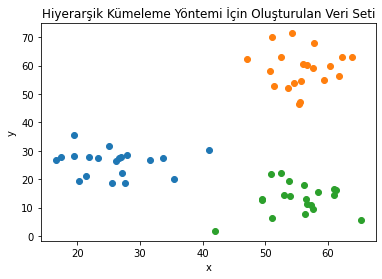

In [3]:
# görselleştirelim
plt.figure()
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Hiyerarşik Kümeleme Yöntemi İçin Oluşturulan Veri Seti")
plt.show()

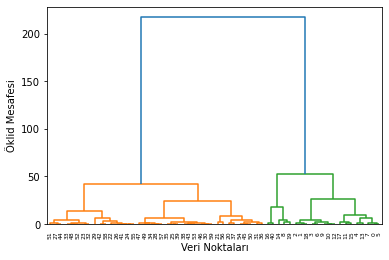

In [4]:
# Dendrogram oluşturalım
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("Veri Noktaları")
plt.ylabel("Öklid Mesafesi")
plt.show()

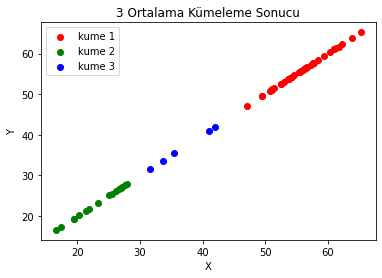

In [7]:
# Hiyerarşik kümeleme algoritması eğitimi ve testi
from sklearn.cluster import AgglomerativeClustering
hiyerarsi_kume = AgglomerativeClustering(n_clusters = 3, 
    affinity = "euclidean", linkage = "ward")
# Eğitim
kume = hiyerarsi_kume.fit_predict(data)
data["label"] = kume 
# Görsel
plt.figure()
plt.scatter(data.x[data.label == 0], data.y[data.label == 0], 
    color = "red", label = "kume 1")
plt.scatter(data.x[data.label == 1], data.y[data.label == 1], 
    color = "green", label = "kume 2")
plt.scatter(data.x[data.label == 2], data.y[data.label == 2], 
    color = "blue", label = "kume 3")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("3 Ortalama Kümeleme Sonucu")
plt.show()